In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
def hash(key, M):
    return key % M


In [33]:
def quadratic_probing(hash_table, key, M):
    i = 0 # number of probes - 1
    index = hash(key, M)
    while hash_table[index] is not None:
        i += 1
        index = (hash(key, M) + i + i**2) % M
    hash_table[index] = key
    return i + 1

def cubic_probing(hash_table, key, M):
    i = 0 # number of probes - 1
    index = hash(key, M)
    while hash_table[index] is not None:
        i += 1
        index = (hash(key, M) + i + i**2 + i**3) % M
    hash_table[index] = key
    return i + 1


In [37]:
def simulate_probing(M, num_keys):
    keys = random.sample(range(1, 10**6), num_keys)
    hash_table_quadratic = [None] * M
    hash_table_cubic = [None] * M
    total_probes_quadratic = 0
    sum_probes_quadratic = 0 # for calculating average
    total_probes_cubic = 0
    sum_probes_cubic = 0 # for calculating average

    for key in keys:
        probes = quadratic_probing(hash_table_quadratic, key, M)
        total_probes_quadratic += probes
        sum_probes_quadratic += probes

        probes = cubic_probing(hash_table_cubic, key, M)
        total_probes_cubic += probes
        sum_probes_cubic += probes
    return (total_probes_quadratic, sum_probes_quadratic/num_keys, total_probes_cubic, sum_probes_cubic/num_keys)


In [38]:
M_values = [101, 503, 1009, 5003, 10007, 50021, 100003, 500009]
load_factors = [0.4, 0.5, 0.7, 0.9, 0.99]


In [55]:
avg_probes_quadratic_dict = {lf: [] for lf in load_factors}
avg_probes_cubic_dict = {lf: [] for lf in load_factors}

for M in M_values:
    for load_factor in load_factors:
        num_keys = int(load_factor * M)
        total_probes_quadratic, avg_probes_quadratic, total_probes_cubic, avg_probes_cubic = simulate_probing(M, num_keys)
        avg_probes_quadratic_dict[load_factor].append(avg_probes_quadratic)
        avg_probes_cubic_dict[load_factor].append(avg_probes_cubic)
        print(f'M = {M}, load factor = {load_factor}, avg_probes_quadratic = {avg_probes_quadratic}, avg_probes_cubic = {avg_probes_cubic}')

M = 101, load factor = 0.4, avg_probes_quadratic = 1.475, avg_probes_cubic = 1.375
M = 101, load factor = 0.5, avg_probes_quadratic = 1.5, avg_probes_cubic = 1.44
M = 101, load factor = 0.7, avg_probes_quadratic = 2.057142857142857, avg_probes_cubic = 1.7428571428571429
M = 101, load factor = 0.9, avg_probes_quadratic = 2.422222222222222, avg_probes_cubic = 2.7444444444444445
M = 101, load factor = 0.99, avg_probes_quadratic = 2.727272727272727, avg_probes_cubic = 3.898989898989899
M = 503, load factor = 0.4, avg_probes_quadratic = 1.2487562189054726, avg_probes_cubic = 1.228855721393035
M = 503, load factor = 0.5, avg_probes_quadratic = 1.350597609561753, avg_probes_cubic = 1.3745019920318724
M = 503, load factor = 0.7, avg_probes_quadratic = 1.9261363636363635, avg_probes_cubic = 1.9090909090909092
M = 503, load factor = 0.9, avg_probes_quadratic = 2.7389380530973453, avg_probes_cubic = 2.5730088495575223
M = 503, load factor = 0.99, avg_probes_quadratic = 4.466800804828974, avg_prob

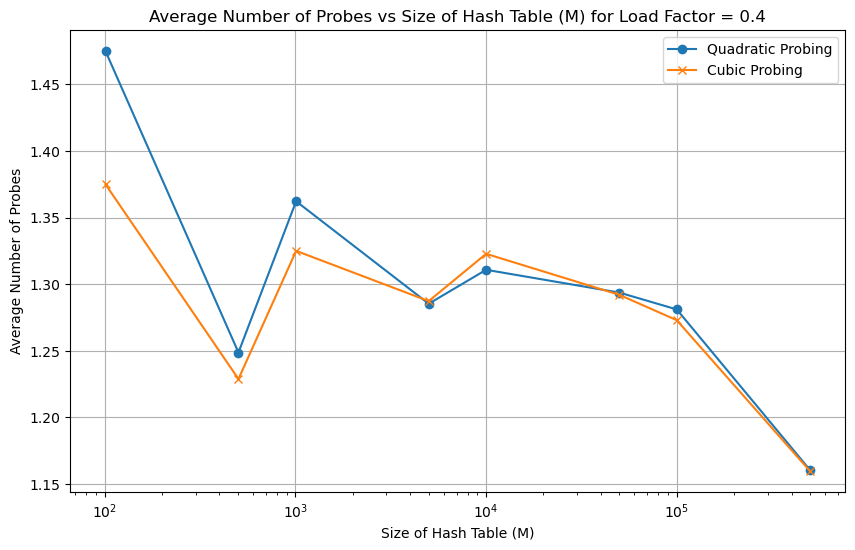

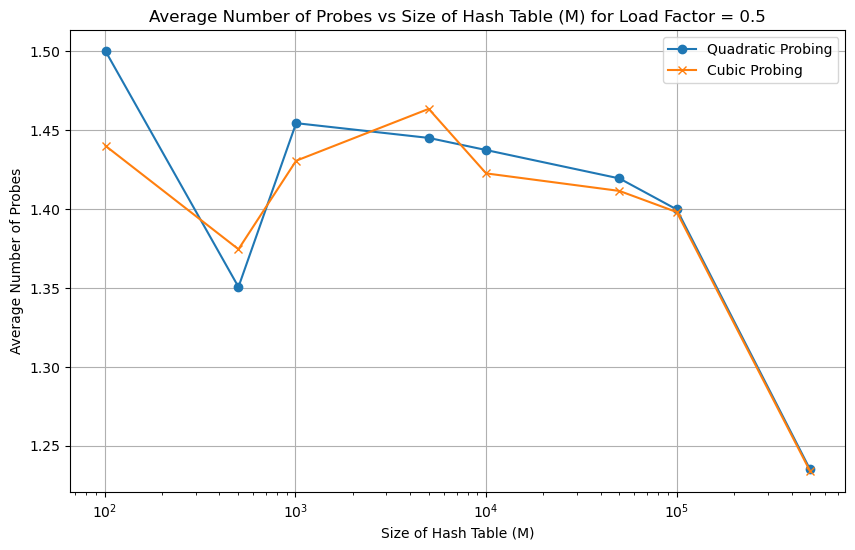

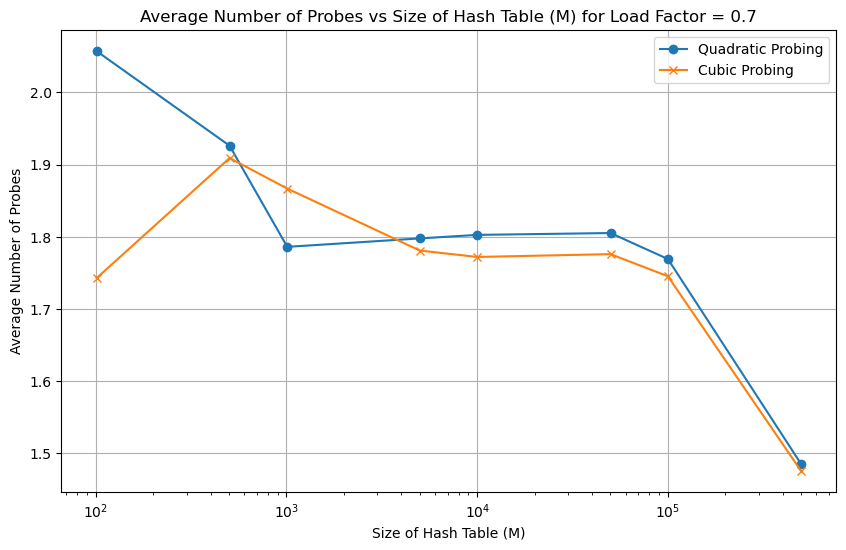

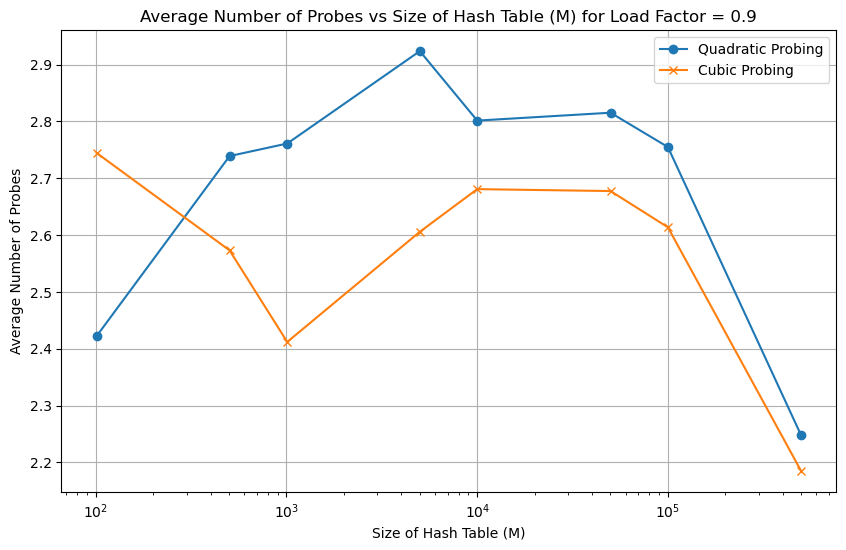

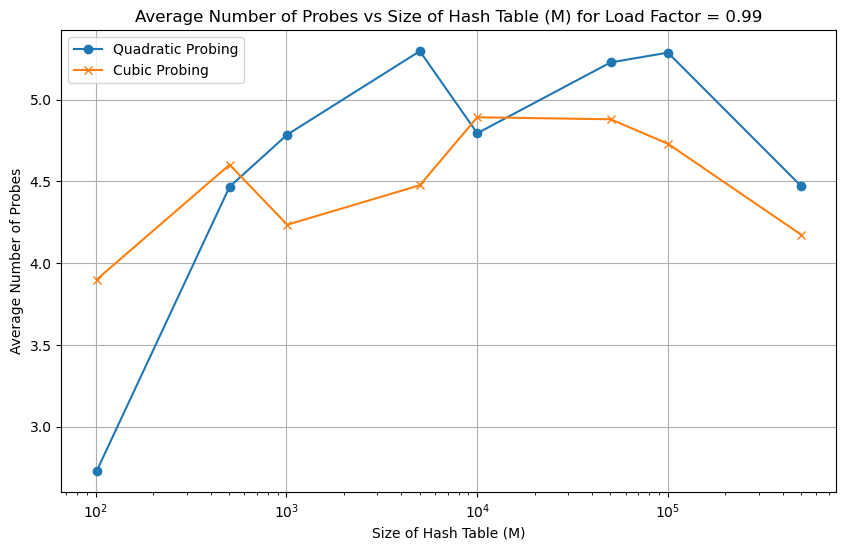

In [56]:
for load_factor in load_factors:
    plt.figure(figsize=(10, 6))
    plt.plot(M_values, avg_probes_quadratic_dict[load_factor], marker='o', label='Quadratic Probing')
    plt.plot(M_values, avg_probes_cubic_dict[load_factor], marker='x', label='Cubic Probing')
    
    plt.xlabel('Size of Hash Table (M)')
    plt.ylabel('Average Number of Probes')
    plt.title(f'Average Number of Probes vs Size of Hash Table (M) for Load Factor = {load_factor}')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.show()
